<a href="https://colab.research.google.com/github/dhapitha22/Heart-Disease-Prediction-ML/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Heart Diseases Using the Machine learning algorithm**

##**Problem Statement**

Heart diseases, also known as "Cardiovascular diseases," are conditions that adversely impact the heart. Various types and categories of diseases can occur for numerous reasons and present different symptoms. Examples of heart diseases people may experience include congenital heart disease, coronary artery disease, arrhythmia, dilated cardiomyopathy, heart failure, and myocardial infarction. Each disease has unique symptoms and affects individuals differently. Early detection of heart disease allows patients to take necessary measures to mitigate or reduce its effects.

Machine learning has become a popular topic due to its widespread use across diverse fields. It can be considered an application of artificial intelligence, as it enables systems to think and make decisions independently without explicit programming. The healthcare industry can also benefit from machine learning.

This project entails a report or documentation about designing and implementing a pipeline to address this problem as a data scientist. The goal is to determine the likelihood of a person being affected by heart disease based on specific attributes provided.

# **Data Collection**
##**Dataset**

 Kaggle.com is a platform offering numerous public datasets across various fields and categories. One such dataset is "Heart Disease UCI," which provides suitable attributes and targets for training and testing the model implemented in this assignment. The dataset can be accessed via the following link:


> data set - https://www.kaggle.com/ronitf/heart-disease-uci


##**Dataset Information**

There are 14 attributes and 304 occurrences in this collection.The summarization is as follows:

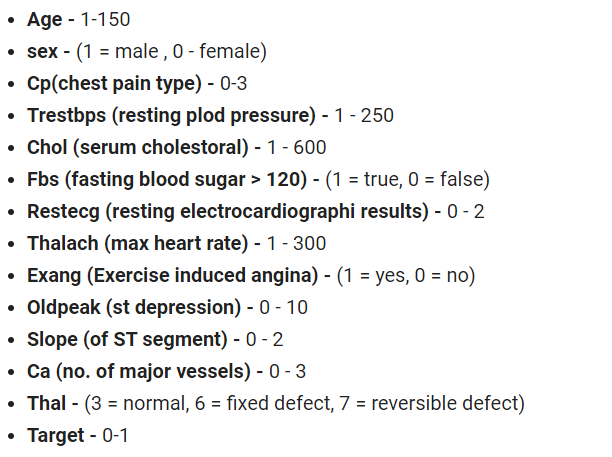

There are two objectives or groups in this dataset, which are indicated by the "target" attribute, which indicates whether the patient has a heart condition or not based on 1 and 0, which reflect "yes" and "no" accordingly.




# **Designing and implementing**

##**Import the necessary libraries**

The first step in implementing any algorithm is to import the necessary libraries. The libraries used for high-performance calculations and computing, data visualization, and styling are imported in the code segment below. Additionally, any unwanted warnings are ignored to ensure a smooth execution of the code.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn import tree


The libraries needed for training, testing, and splitting the dataset, as well as the library required to scale features in the dataset, are imported in the above code section.

##**Importing the dataset**

In [ ]:
data_frame = pd.read_csv("heart_disease_dataset.csv")

##**Summerize and show statistics for the dataset provided**

In [ ]:
data_frame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##**Generate a visual summery for the dataset provided**

Data visualization is an essential stage in comprehending the dataset's characteristics and finding any necessary processing. A correlation matrix, which shows the correlation coefficients between the variables, is one method to view the data. This matrix can be used to summarize, evaluate, and examine data for further advanced research. Understanding variable connections is critical for finding trends and making accurate forecasts with machine learning algorithms.

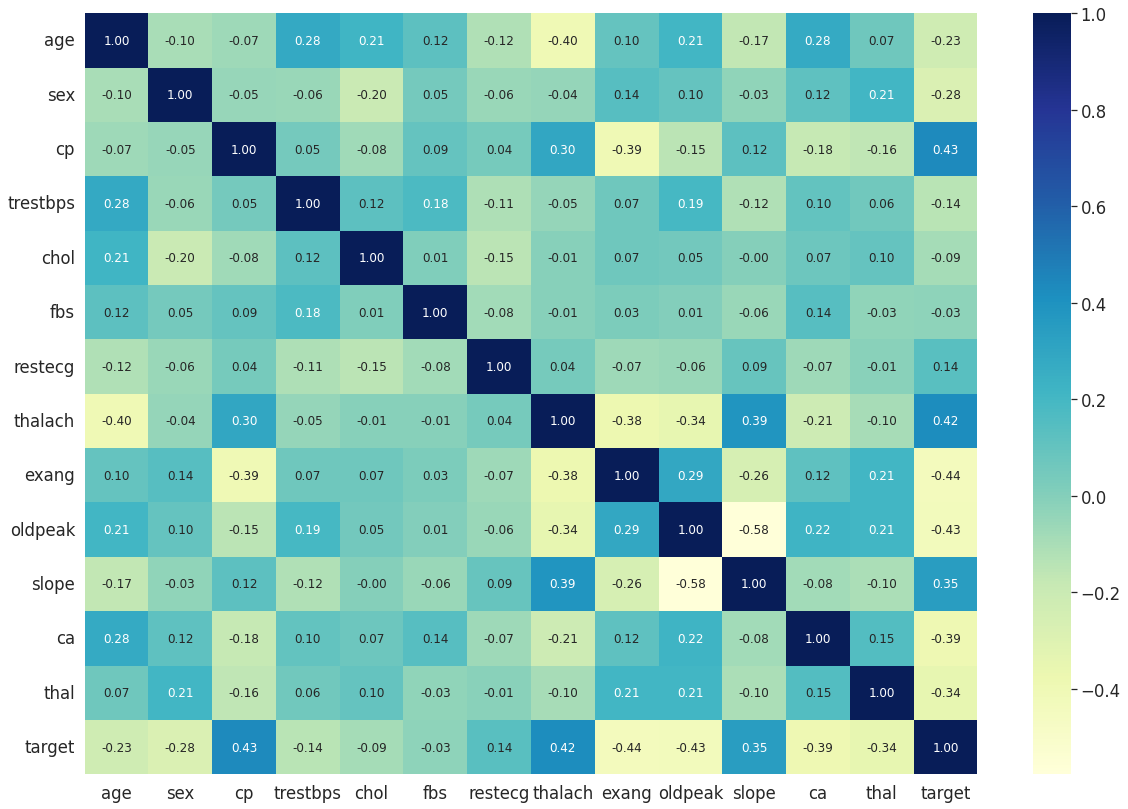

In [ ]:
correlation_matrix = data_frame.corr()
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(20, 14))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt='.2f', annot_kws={"size": 12},
            xticklabels=correlation_matrix.columns.values, yticklabels=correlation_matrix.columns.values, ax=ax)
plt.show()


##**Visualize variables using histograms**

The code below is used to generate histograms for each characteristic in the collection. A histogram can be used to visualize the spread of data for each characteristic. The result of the following code is a collection of histograms. We can see from the output that the features have distinct distribution values.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

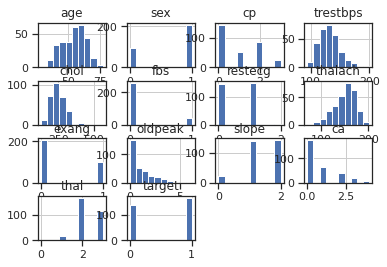

In [ ]:
data_frame.hist()

**Checking for the distribution of the target class in the provided dataset.**

Text(0, 0.5, 'class count')

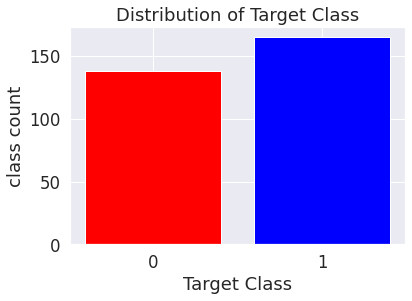

In [ ]:
rcParams['figure.figsize'] = 6,4
plt.bar(data_frame['target'].unique(), data_frame['target'].value_counts(), color = ['blue', 'red'])
plt.xticks([0, 1])
plt.title('Distribution of Target Class')
plt.xlabel('Target Class')
plt.ylabel('class count')

It is a best practice to work with datasets that have equal numbers of sentiment classes when training a machine learning model. The above code segment can be used to identify the count of each sentiment class and display it in a chart. By analyzing the output of the code, we can see that although the distribution is  exactly 50-50, there is a sufficient ratio of distribution for each target class.

# **Data Processing**

After comprehending the dataset through the preceding stages, it is critical to determine the required conversions and processing. In this instance, analysis of the dataset showed the need for translation of certain category variables into dummy variables and value scaling prior to machine learning model training.


**Creating dummy columns to convert categorical values into dummy variables and scaling the dataset**

In [ ]:
data_frame = pd.get_dummies(data_frame, columns = ['sex', 'slope', 'fbs', 'ca', 'exang', 'cp', 'restecg', 'thal'])

**This is the point at which the data is scaled. The code section below will scale the given column.**

In [ ]:
scaling = StandardScaler()
scaling_col = ['oldpeak', 'age', 'oldpeak', 'thalach', 'chol']
data_frame[scaling_col] = scaling.fit_transform(data_frame[scaling_col])

# **Machine Learning**

**Splitting the dataset into 02 as training data and testing data to train and test the algorithm**

This is the part in which the model is trained and evaluated with test data. The complete dataset has been divided into two distinct datasets in the code excerpt below, with one dataset used to train the model and the other used to evaluate the precision of the trained model.


In [ ]:
Y = data_frame['target']
X = data_frame.drop(['target'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
feature_list = list(X.columns)

# **K-Nearest Neighbor (KNN) Classifier**

The K-Nearest Neighbor (KNN) Classifier is a type of supervised machine learning algorithm that is commonly used for classification tasks. The KNN classifier is a non-parametric algorithm that can be used for both binary and multiclass classification problems.

The KNN classifier works by storing all available cases and classifying new cases based on a similarity measure, which is typically a distance function such as Euclidean distance or Manhattan distance. The K in KNN refers to the number of nearest neighbors that are considered when classifying a new data point. In other words, the KNN classifier finds the K data points in the training dataset that are closest to the new data point and assigns the class label that is most common among the K neighbors to the new data point.

To summarize, the KNN classifier is a simple yet effective algorithm for classification tasks. It is easy to implement and is useful when the decision boundary is complex or non-linear. However, it can be computationally expensive, especially for large datasets, and requires careful selection of the distance metric and value of K.

**Using the 'K Neighbors Classifier' algorithm, plotting a score graph representing different number of neighbors.**

This section of code will run the KNN Classifier algorithm and add the results to a collection of results, which will later be used to determine where the greatest precision was present.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Score = []
for k_value in range(1,16):
    knnclf = KNeighborsClassifier(n_neighbors = k_value)
    knnclf.fit(x_train, y_train)
    Score.append(knnclf.score(x_test, y_test))

**Identify the  value of K**

The following code segment generates a graph that visually displays the scores achieved by the model for different numbers of neighbors, or values of "K". The resulting output of this segment is a graph that represents the score values.

Text(0.5, 1.0, 'KNN scores with different no of neighbor')

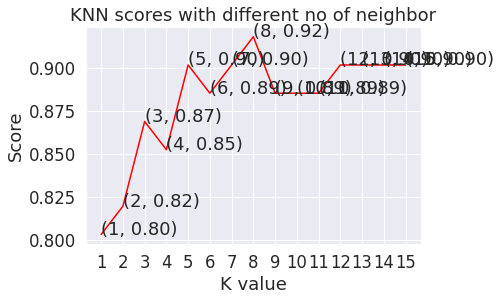

In [ ]:
plt.plot([k_value for k_value in range(1, 16)], Score, color = 'red')
for x in range(1,16):
     plt.text(x, Score[x-1],  f"({x}, {Score[x-1]:.2f})")
plt.xticks([x for x in range(1, 16)])
plt.xlabel('K value')
plt.ylabel('Score')
plt.title('KNN scores with different no of neighbor')

**Based on the analysis of the graph, it can be observed that the KNN algorithm achieved the highest score when the number of neighbors was set to 8, resulting in a score of 0.92.**

##**Do the prediction based on the test collection**

The model use the testing data, which constitutes 20% of the heart disease dataset, to make predictions on whether or not a particular individual has heart disease.

In [ ]:
knn_classifier_pred = knnclf.predict(x_test)
knn_classifier_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

# **KNN Model Testing**

Once the model has been extensively trained with the training dataset, it becomes necessary to evaluate how accurately the classifier can predict new data. This process is commonly referred to as testing. In this classifier, the following testing techniques are being employed.

For training and assessment reasons, the gathered data was divided in an 80/20 ratio.
The classifier uses the 20% of the data for prediction and achieves an accuracy score of 0.90 for the test data.  


In [ ]:
acc=sm.accuracy_score(y_test, knn_classifier_pred)
print(f"Accuracy : {acc:.2f}")

Accuracy : 0.90


# **KNN model classification report**

The classification report is a useful tool for evaluating the performance of a classification model. It provides a summary of the most important classification metrics for each class in the dataset. The key metrics included in a classification report are precision, recall, F1 score, and support.


**Precision:** Precision is a measure of a classification model's ability to correctly classify the positive cases. It is the ratio of true positive (TP) cases to the sum of true positives and false positives (FP), i.e., precision = TP / (TP + FP).

**Recall:** Recall is a measure of a classification model's ability to correctly identify all the positive cases. It is the ratio of true positive (TP) cases to the sum of true positives and false negatives (FN), i.e., recall = TP / (TP + FN).

**F1 Score:** The F1 score is a harmonic mean of precision and recall. It is a measure of a classification model's accuracy, taking both precision and recall into account. It is calculated as F1 score = 2 * ((precision * recall) / (precision + recall)).

**Support:** Support is the number of samples in each class of the dataset.

In summary, the classification report provides a comprehensive evaluation of a classification model's performance for each class in the dataset. It is a useful tool for identifying the strengths and weaknesses of a model and improving its performance.

In [ ]:
print("Generatede classification report for the predictions : \n\n", metrics.classification_report(knn_classifier_pred, y_test, target_names = ["heart disease","No heart disease"]))

Generatede classification report for the predictions : 

                   precision    recall  f1-score   support

   heart disease       0.90      0.90      0.90        29
No heart disease       0.91      0.91      0.91        32

        accuracy                           0.90        61
       macro avg       0.90      0.90      0.90        61
    weighted avg       0.90      0.90      0.90        61



## **Results and Discussion**

The K-Nearest Neighbor Classifier method was used to construct and execute the machine learning model, and the findings revealed that the accuracy or scores of the model varied based on the number of neighbors. The model was evaluated with numbers ranging from 1 to 15 for "K," or the number of neighbors, and it gave an acceptable score of 90% when the number of neighbors was 8.



This suggests that selecting the right number of neighbors is crucial for obtaining accurate predictions using this model. Despite the model's ability to provide reasonably accurate predictions, the variation in accuracy for different numbers of neighbors can be viewed as a limitation of this implemented machine learning model.


#**Decision Tree Classifier**

A supervised learning method used for classification jobs is a decision tree classifier. Based on the values of the incoming features, it recursively divides the feature space into progressively smaller areas until it approaches a stopping condition.

The decision tree algorithm chooses the characteristic and split point at each stage that best divides the data into the various groups. An contamination measure, such as the Gini index or entropy, is optimized in order to achieve this.

Using the values of the input features to navigate the tree from the root node to a child node, the decision tree can then be used to categorize new data points. The new data point is then given the class name connected to the leaf component.

Both categorical and numerical input characteristics can be handled by decision trees, and they are simple to understand.

Scikit-learn's decision tree classification has a number of hyperparameters that can be changed to regulate the algorithm's behavior. A short description of some of the most popular hyperparameters is provided below:



*   **max_depth -** The maximum depth of the decision tree.

*   **min_samples_split -** The minimum amount of data required to divide a node


*   **min_samples_leaf -** The minimum amount of data that is required to present in a leaf node

*   **max_features -** a node can be divided using a maximal amount of features. To manage the decision tree's intricacy and avoid overfitting, use this hyperparameter.

*   **criterion -** the method by which a split's excellence is evaluated. Gini and entropy are the two factors that are most frequently used. Entropy measures the knowledge gained from a split, while Gini measures the purity of the groups in a split.

A decision tree algorithm has a large number of hyperparameters that can be changed, and these are just a few of them. Finding the ideal values for the hyperparameters frequently involves some trial and error depending on the our issue and data. in this case i choose max_depth to evaluate my model.





**Train and evaluate a decision tree for each maximum depth**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
training_errs = []
testing_errs = []


for x in range(1,11):
    DecisionTree_Classifier  = DecisionTreeClassifier(max_depth=x)
    DecisionTree_Classifier.fit(x_train, y_train)

    training_pred = DecisionTree_Classifier.predict(x_train)
    training_err = 1 - accuracy_score(y_train, training_pred)
    training_errs.append(training_err)

    testing_pred = DecisionTree_Classifier.predict(x_test)
    testing_err = 1 - accuracy_score(y_test, testing_pred)
    testing_errs.append(testing_err)

# disply the evaluated results
for j in range(0,10):
    print("Max Depth: {}\tTrain Error: {:.3f}\tTest Error: {:.3f}".format(j, training_errs[j], testing_errs[j]))


Max Depth: 0	Train Error: 0.244	Test Error: 0.197
Max Depth: 1	Train Error: 0.240	Test Error: 0.279
Max Depth: 2	Train Error: 0.153	Test Error: 0.180
Max Depth: 3	Train Error: 0.124	Test Error: 0.148
Max Depth: 4	Train Error: 0.054	Test Error: 0.180
Max Depth: 5	Train Error: 0.041	Test Error: 0.197
Max Depth: 6	Train Error: 0.008	Test Error: 0.197
Max Depth: 7	Train Error: 0.004	Test Error: 0.164
Max Depth: 8	Train Error: 0.000	Test Error: 0.164
Max Depth: 9	Train Error: 0.000	Test Error: 0.164


The training error tends to reduce as the maximum depth rises because the model can produce complex decision limits that more closely match the training data.
The rising test error as the maximum depth rises, however, indicates that if the maximum depth is too high, the model could overfit the training data and underperform on  unknown, new data.

according to this result, it appears that a maximum depth of 3 might be a wise decision because it gets a reasonably low test error without overfitting.

#**Decision Tree Classifier Testing**

In [ ]:
clf_acc=sm.accuracy_score(y_test, testing_pred)
print(f"Decision Tree Classifier Accuracy: {clf_acc:.2f}")

Decision Tree Classifier Accuracy: 0.84


# **Results and Discussion**
Based on the results, we can see that the training error generally decreases as the maximum depth increases. This is because the model is able to fit the training data more closely as it becomes more complex. However, this does not always translate to better performance on new, unseen data (test data).

The test error, on the other hand, initially decreases as the maximum depth increases up to a point (maximum depth of 3 in this case), indicating that the model is generalizing well to new data. However, beyond a certain point (maximum depth of 3), the test error starts to increase again, indicating that the model is overfitting to the training data and not able to generalize well to new data.

Based on these results, it would be best to choose a maximum depth value of 3 for this decision tree model as it provides the lowest test error and got 85% model accuracy.

## **display the desicion tree**

In [ ]:
import graphviz
dataframe = tree.export_graphviz(DecisionTree_Classifier)
decision_tree = graphviz.Source(dataframe)
decision_tree.render("heart_disease_prediction")

'heart_disease_prediction.pdf'

# **SVM classifier**

SVM is a supervised machine learning method that can be used for both categorization and regression tasks. It functions by determining the optimum hyperplane for separating the various classes or predicting the goal values.


When categorizing data, the hyperplane is chosen to minimize the distance between the two classes or to maximize the distance between the hyperplane and the closest data points for each class. The phrase "support vector machine" is derived from the word "support vector," which refers to data values on the peripheral. SVM can handle both linearly separable and non-linearly separable datasets by employing different kernel functions that transform the input data into a higher-dimensional space where identifying a linear boundary is easier.


SVM has a number of benefits, including the ability to handle high-dimensional data, resilience to anomalies, and the ability to handle datasets that can be separated in both linearly and non-linearly. SVM can be computationally costly for big datasets and can be susceptible to the selection of hyperparameters.

The efficacy of SVMs can be improved by adjusting a number of hyperparameters. Among the frequently used SVM hyperparameters are


*   **C -** The regularization value that manages the compromise between getting low training and low testing errors. A bigger C value results in a narrower margin and fewer misclassifications of training data, while a smaller C value results in a broader margin and more of them.
*   **kernel -**The function known as the kernel transforms the incoming data into a higher-dimensional feature space that makes it simpler to distinguish between groups. The sigmoid, linear, quadratic, and radial basis function (RBF) are common kernel functions.

*   **gamma -**The kernel parameter that controls the shape of the decision border. A large gamma value represents a Gaussian kernel with a small variance and a more complex decision border, whereas a small gamma value represents a Gaussian (bell-shaped) kernel with a large variance and a seamless decision border.



We specified the goal, made an object with 5-fold cross-validation for grid search, ran the grid search on the training data, and printed the resulting value to find the best hyperparameter value for our SVM classification model.

In [ ]:
SVM_classifier = SVC()
parameters_grid = {'kernel': ['rbf','linear', 'poly'],'C': [0.001,0.01, 0.1, 1, 10], 'gamma': ['auto','scale']}

search_grid = GridSearchCV(SVM_classifier, parameters_grid, cv=5, n_jobs=-1)
SVM_classifier = search_grid.fit(x_train, y_train)

print("our model's top hyperparameter value: ", search_grid.best_params_)

our model's top hyperparameter value:  {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}


Cross-validation can be used to assess how well each hyperparameter performs on a validation set in order to determine the optimal C, gamma, and kernel for an SVM.based on our heart disease data,
the best found hyperparameters of our SVM classifier is kernel - poly, C - 1, gamma - scale.

# **SVM Classifier Testing**

In [ ]:
pred_SVMclf = SVM_classifier.predict(x_test)
pred_SVMclf

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, pred_SVMclf)
print(f"SVM Classifier Accuracy: {accuracy:.2f}")

SVM Classifier Accuracy: 0.84


In [ ]:
print("Generatede classification report for the predictions : \n\n", metrics.classification_report(pred_SVMclf, y_test, target_names = ["heart disease","No heart disease"]))

Generatede classification report for the predictions : 

                   precision    recall  f1-score   support

   heart disease       0.83      0.83      0.83        29
No heart disease       0.84      0.84      0.84        32

        accuracy                           0.84        61
       macro avg       0.84      0.84      0.84        61
    weighted avg       0.84      0.84      0.84        61



# **Results and Discussion**

SVM trained model with kernel = poly, C = 1, and gamma = scale obtained an average accuracy of 0.84 based on the classification report. This indicates that 84% of the test set's data points were properly categorized by the algorithm.

The algorithm accurately identified 83% of cases of heart disease and misclassified 17% of them for heart disease, giving it a precision, recall, and F1-score of 0.83. Similar results were obtained for no cardiac illness, where the model had a precision, recall, and F1-score of 0.84, accurately classifying 84% of the cases and misclassifying 16% of them.

Overall, the SVM model with the specified hyperparameters performed reasonably well with an accuracy of 0.84 and similar precision, recall, and F1-scores for both classes.

In [ ]:
!jupyter nbconvert --to html heart_disease_prediction_gismaA505.ipynb

[NbConvertApp] Converting notebook heart_disease_prediction_gismaA505.ipynb to html
[NbConvertApp] Writing 1029198 bytes to heart_disease_prediction_gismaA505.html
